In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split

In [2]:
data = pandas.read_csv('MobilePhones.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


According to features I personally choose predicting price range

# Data Visualization

In [3]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [4]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


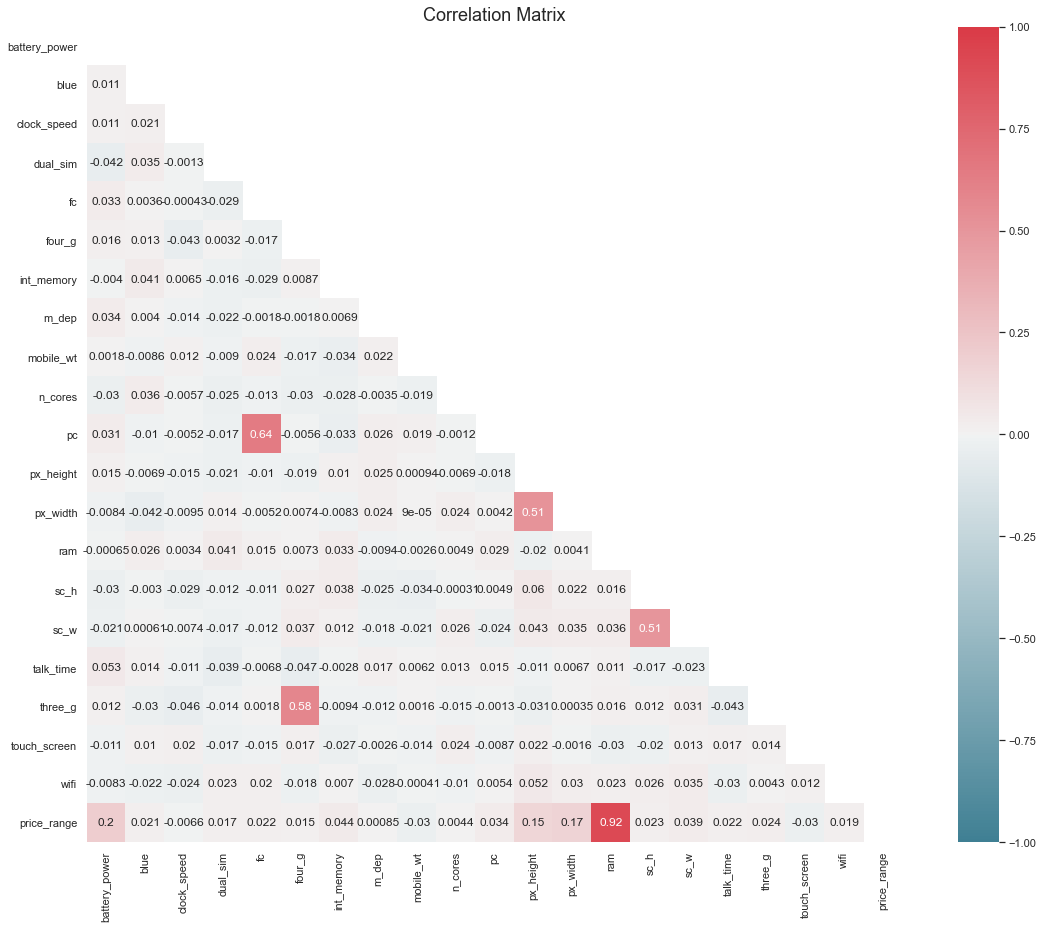

In [5]:
#Correlation matrix
sns.set(style="white")

corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, annot=True)

plt.show()

According to correlation matrix ram has high relation with price range afther ram battery power, px_height and px_width are related with price range

array([[<AxesSubplot:title={'center':'price_range'}>]], dtype=object)

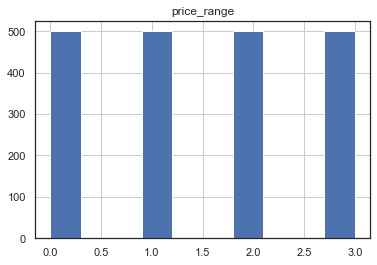

In [6]:
#Histogram
data.hist(column='price_range')

According to histogram disturbition of price_range is equal in dataset

# Price & RAM

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'ram vs price_range'}, xlabel='ram', ylabel='price_range'>

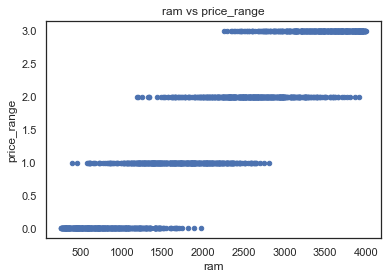

In [7]:
#scatter
data.plot.scatter(x='ram', y='price_range', title='ram vs price_range')

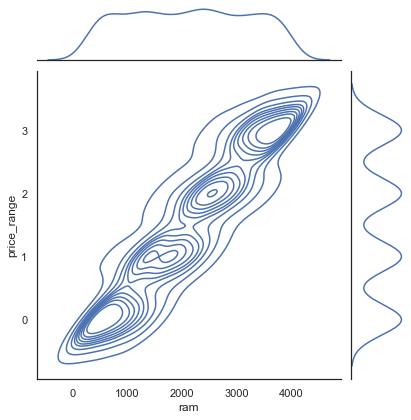

In [8]:
#jointplot
sns.jointplot(x='ram',y='price_range',data=data,kind='kde');

<AxesSubplot:xlabel='ram', ylabel='price_range'>

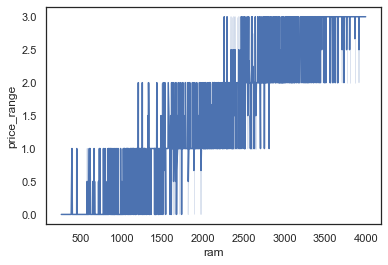

In [9]:
#lineplot
sns.lineplot(x='ram',y='price_range',data=data)

Visualization proves there is high importance on ram

# Price & Battery Power

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'battery power vs price_range'}, xlabel='battery_power', ylabel='price_range'>

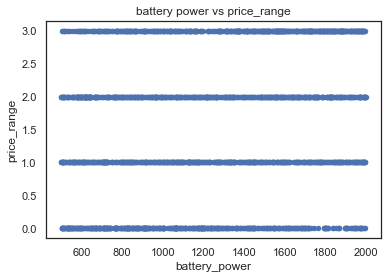

In [10]:
#scatter
data.plot.scatter(x='battery_power', y='price_range', title='battery power vs price_range')

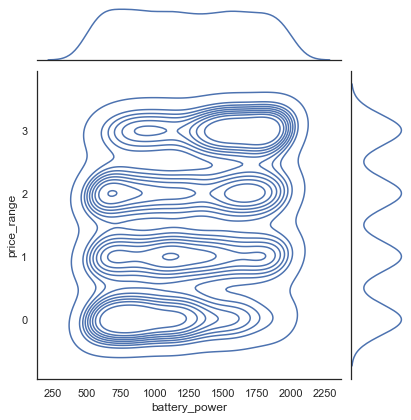

In [11]:
#jointplot
sns.jointplot(x='battery_power',y='price_range',data=data,kind='kde');

<AxesSubplot:xlabel='battery_power', ylabel='price_range'>

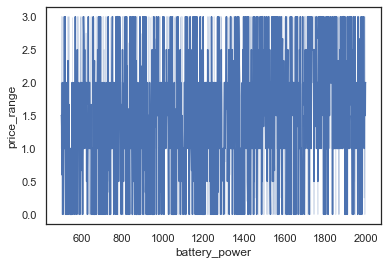

In [12]:
sns.lineplot(x='battery_power',y='price_range',data=data)

According to visualization battery power has effect on price range but it does not mean it has to have high battery power to have high price range

# Price & px_width

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'px_width vs price_range'}, xlabel='px_width', ylabel='price_range'>

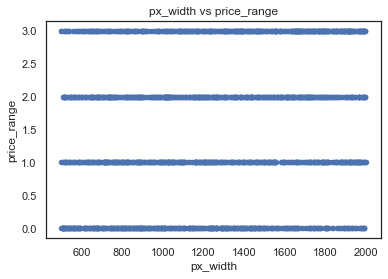

In [13]:
#scatter
data.plot.scatter(x='px_width', y='price_range', title='px_width vs price_range')

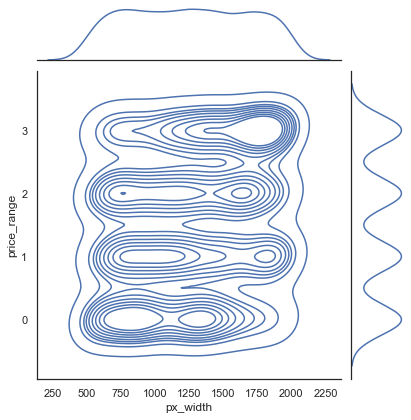

In [14]:
#jointplot
sns.jointplot(x='px_width',y='price_range',data=data,kind='kde');

<AxesSubplot:xlabel='px_width', ylabel='price_range'>

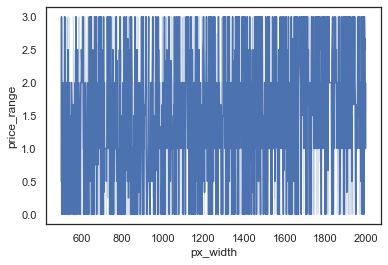

In [15]:
sns.lineplot(x='px_width',y='price_range',data=data)

According to graphs higher graph width has effect on higher price_range like battery power

# Price & Mobile_wt

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'mobile_wt vs price_range'}, xlabel='mobile_wt', ylabel='price_range'>

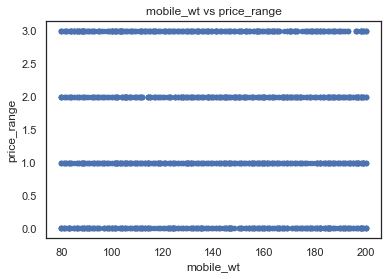

In [16]:
#scatter
data.plot.scatter(x='mobile_wt', y='price_range', title='mobile_wt vs price_range')

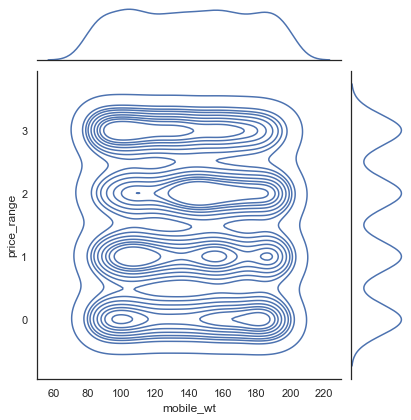

In [17]:
#jointplot
sns.jointplot(x='mobile_wt',y='price_range',data=data,kind='kde');

<AxesSubplot:xlabel='mobile_wt', ylabel='price_range'>

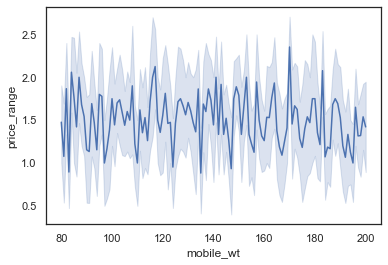

In [18]:
sns.lineplot(x='mobile_wt',y='price_range',data=data)

According to correlation matrix mobile_wt has the highest inverse correlation (equal with touch_screen) specially when we look joint plot highest price range phones mostly in lowest mobile_wt but in lowest price range phones this mobile_wt does not show high effectiveness

# Methods

I am going to predict price_range feature. According to this feature has discrete values [0,1,2,3] I am going to use classification models

# Split

In [19]:
M=data.values
X = M[:,0:20]
y = M[:,20]

In [20]:
X.shape

(2000, 20)

In [21]:
y.shape

(2000,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
y_train.shape

(1600,)

# KNN

I choose k as 20 due to k = sqrt(N)/2

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.935

# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.7975

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)
dtree.score(X_test, y_test)

0.8325

According to first tests KNN shows better result then desition tree and naive bayes it is expected result due to naive bayes knowns as bad estimator. Naive Bayes used as its advantage on usable with small train data and fast speed. Decision tree needs good data manipulation to give better results I think this is why it has worse result then KNN.

# Evaluation

Another approach for k value in knn. Choosing odd k numbers

In [27]:
x=[5,7,9,11,13,15,19,21]
for k in x:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train,y_train)
    print(knn2.score(X_test, y_test))

0.9425
0.955
0.955
0.95
0.95
0.945
0.9475
0.9425


according to the results k=7 and k=9 gives better results

# Feature Changes

Taking only features with higher then 0.1 correlation with price_range

In [28]:
data2=data[['battery_power','ram','px_height','px_width','price_range']]

In [29]:
M2=data2.values
X2=M2[:,0:4]
y2=M2[:,4]

In [30]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

# KNN

In [31]:
z=[5,7,9,11,13,15,19,20,21]
for k in z:
    knn3 = KNeighborsClassifier(n_neighbors=k)
    knn3.fit(X2_train,y2_train)
    print(knn3.score(X2_test, y2_test))

0.945
0.9575
0.955
0.9475
0.95
0.95
0.9475
0.935
0.9425


# Navie Bayes

In [32]:
nb2 = GaussianNB()
nb2.fit(X2_train, y2_train)
nb2.score(X2_test, y2_test)

0.7975

# Decision Tree

In [33]:
dtree2 = DecisionTreeClassifier(random_state=42)
dtree2.fit(X2_train,y2_train)
dtree2.score(X2_test, y2_test)

0.865

# Conclusion

According to test with new features KNN with k=7 has slightly better result then first test. Naive Bayes result didn't changed. As expected Decision tree has better result with feature changes. As total result in a dataset like this knn shows the best results. KNN is a good model because of easy to implementation, fast speed and good results. Its a lazy algorithma but it shows good results in easy datasets.